# Data Exploration


In [67]:
# importing 
import h5py
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [68]:
path = "/local/ecw/deepscribe-data/pfa/a_pfa_cleaned.h5"

f = h5py.File(path, 'r')

print("Loaded dataset from {} with {} unique signs".format(path, len(f.keys())))

Loaded dataset from /local/ecw/deepscribe-data/pfa/a_pfa_cleaned.h5 with 179 unique signs


In [69]:
test_sign = "ḪAL"

group = f[test_sign]
print("{} examples of sign {}".format(len(group.keys()), test_sign))

6377 examples of sign ḪAL


dataset attributes: 
 type (129, 177) 
 shape uint8 



/local/ecw/miniconda3/envs/deepscribe/lib/python3.7/site-packages/ipykernel_launcher.py:6: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  


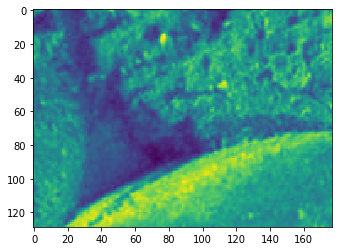

In [70]:
test_indx = list(group.keys())[60]

dset = group[test_indx]
print("dataset attributes: \n type {} \n shape {} \n".format(dset.shape, dset.dtype))
# get numpy array
dset_numpy = dset.value


plt.imshow(dset_numpy)


In [71]:
# getting counts of images by class

counts = {}

for key in f.keys():
    counts[key] = len(f[key].keys())

(array([135.,  23.,   7.,   7.,   3.,   2.,   0.,   0.,   1.,   1.]),
 array([1.0000e+00, 7.8350e+02, 1.5660e+03, 2.3485e+03, 3.1310e+03,
        3.9135e+03, 4.6960e+03, 5.4785e+03, 6.2610e+03, 7.0435e+03,
        7.8260e+03]),
 <a list of 10 Patch objects>)

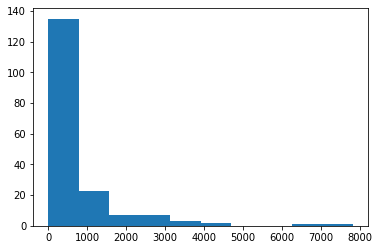

In [72]:
# histogram of counts

plt.figure()
plt.hist(counts.values())

In [76]:
# simple statistics of dataset

signs = list(counts.keys())

signs_sorted = sorted(signs, key=lambda sign: counts[sign], reverse=True)


n = 50

top_n = signs_sorted[:n]

print(top_n)

top_n_counts = [counts[sign] for sign in top_n]
top_n_formatted = ["{}: {}".format(sign, count) for sign, count in zip(top_n, top_n_counts)]

print("top {} signs by count: \n{}".format(n, "\n".join(top_n_formatted)))
print("OTHER: {}".format(sum([counts[sign] for sign in signs_sorted[n:]])))

['NA', 'ḪAL', 'IŠ', 'MEŠ', 'SÌLA', 'AN', 'MIN', 'MA', 'DA', 'DIŠ', 'DU', 'MAN', 'AŠ', 'SAL', 'KUR', 'KI', 'BA', 'RA', 'BAD', 'NÍG', 'ME', '3', 'UL', 'U', 'ITI', 'ŠE', 'IA', 'BAR', 'ḪU', 'GIŠ', 'MI', 'TI', 'UM', 'UR', 'ḪA', 'RI', 'GAL', 'AG', '4', 'IB', 'BU', 'KU', 'IR', 'MAR', '´', '5', 'hi', 'UN', 'NU', 'UD']
top 50 signs by count: 
NA: 7826
ḪAL: 6377
IŠ: 4224
MEŠ: 4172
SÌLA: 3430
AN: 3372
MIN: 3138
MA: 3097
DA: 3095
DIŠ: 2773
DU: 2712
MAN: 2670
AŠ: 2538
SAL: 2520
KUR: 2067
KI: 1949
BA: 1827
RA: 1827
BAD: 1766
NÍG: 1760
ME: 1733
3: 1536
UL: 1424
U: 1322
ITI: 1262
ŠE: 1231
IA: 1208
BAR: 1191
ḪU: 1164
GIŠ: 1094
MI: 1018
TI: 1011
UM: 997
UR: 973
ḪA: 955
RI: 927
GAL: 910
AG: 909
4: 875
IB: 867
BU: 853
KU: 828
IR: 799
MAR: 788
´: 747
5: 693
hi: 676
UN: 654
NU: 647
UD: 647
OTHER: 17151


In [77]:
total_signs = sum(counts.values())

print("Total signs in dataset: {}".format(len(counts)))

print("Total images in dataset: {}".format(total_signs))

print("Top {} signs make up {:.2f} of dataset".format(n, sum(top_n_counts)/total_signs))

Total signs in dataset: 179
Total images in dataset: 110230
Top 50 signs make up 0.84 of dataset


In [78]:
with open(f"top{n}.txt", "w") as outf:
    outf.write("\n".join(top_n))